+------------+----------------------------------------------------+----------------+--------+---------+------+-------------+------+-------+----------------+---------------------------+------------------+--------------------+--------------+
| Unnamed: 0 |                        App                         |    Category    | Rating | Reviews | Size |   Installs  | Type | Price | Content Rating |           Genres          |   Last Updated   |    Current Ver     | Android Ver  |
+------------+----------------------------------------------------+----------------+--------+---------+------+-------------+------+-------+----------------+---------------------------+------------------+--------------------+--------------+
|     0      |   Photo Editor & Candy Camera & Grid & ScrapBook   | ART_AND_DESIGN |  4.1   |   159   | 19.0 |   10,000+   | Free |  0.0  |    Everyone    |        Art & Design       | January 7, 2018  |       1.0.0        | 4.0.3 and up |
|     1      |                Coloring b

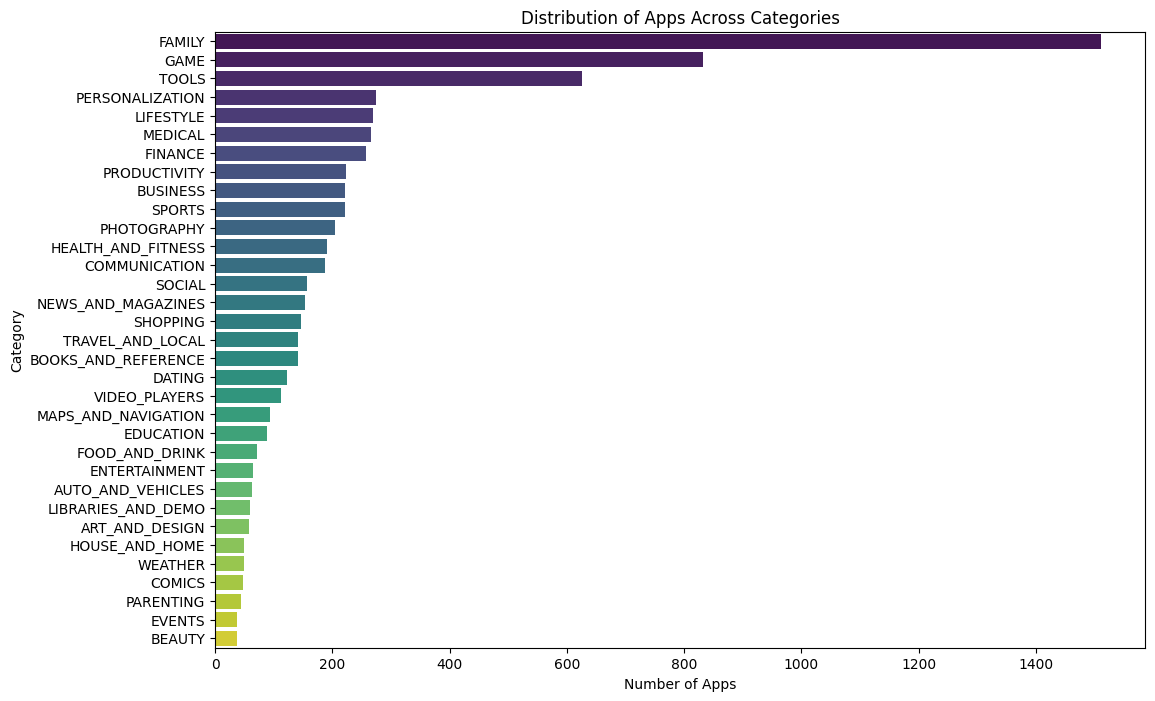

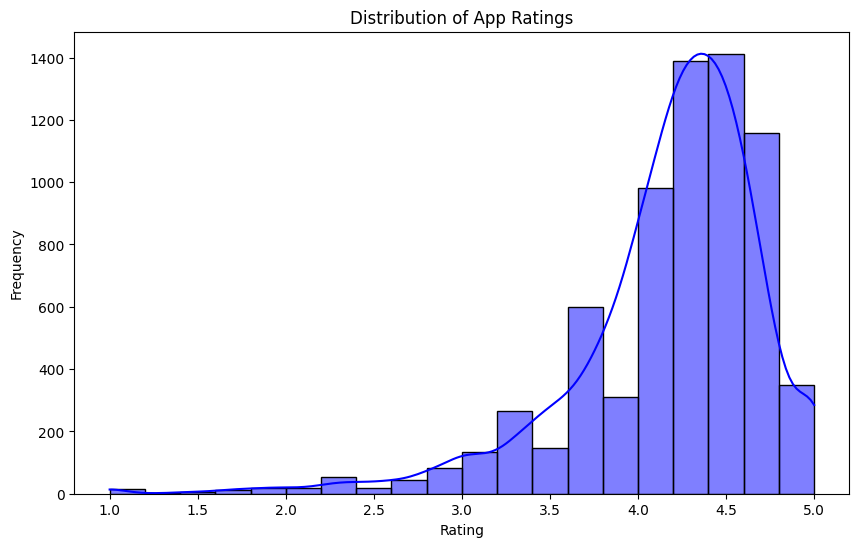

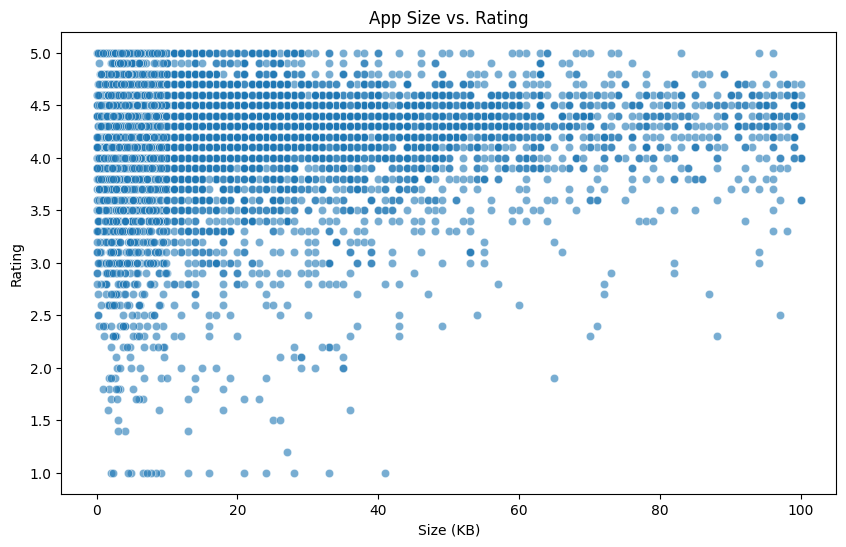

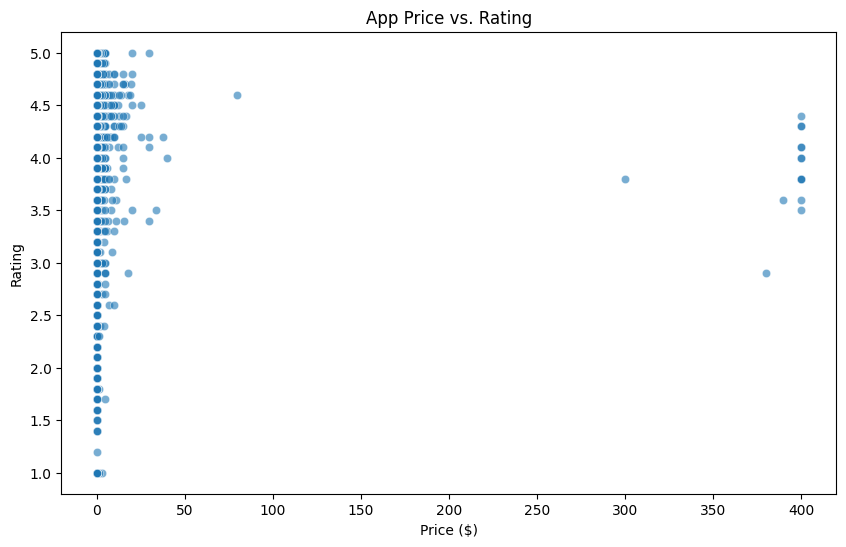

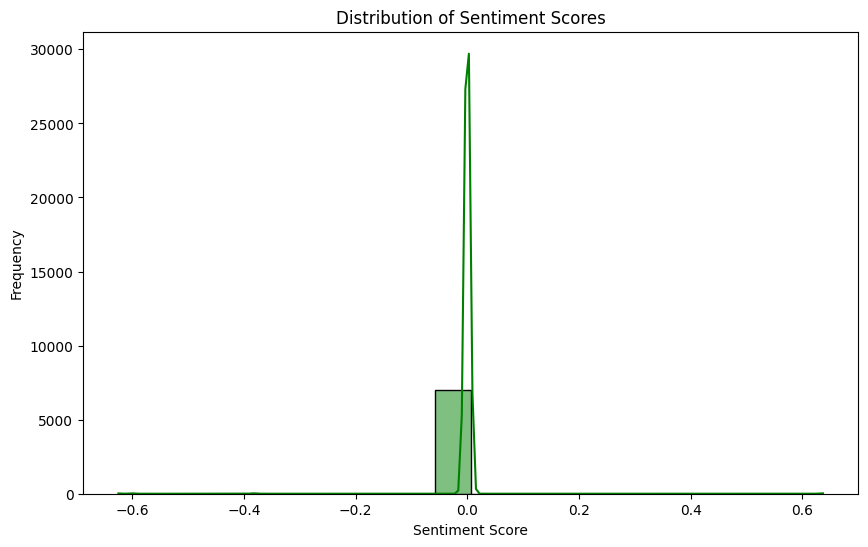

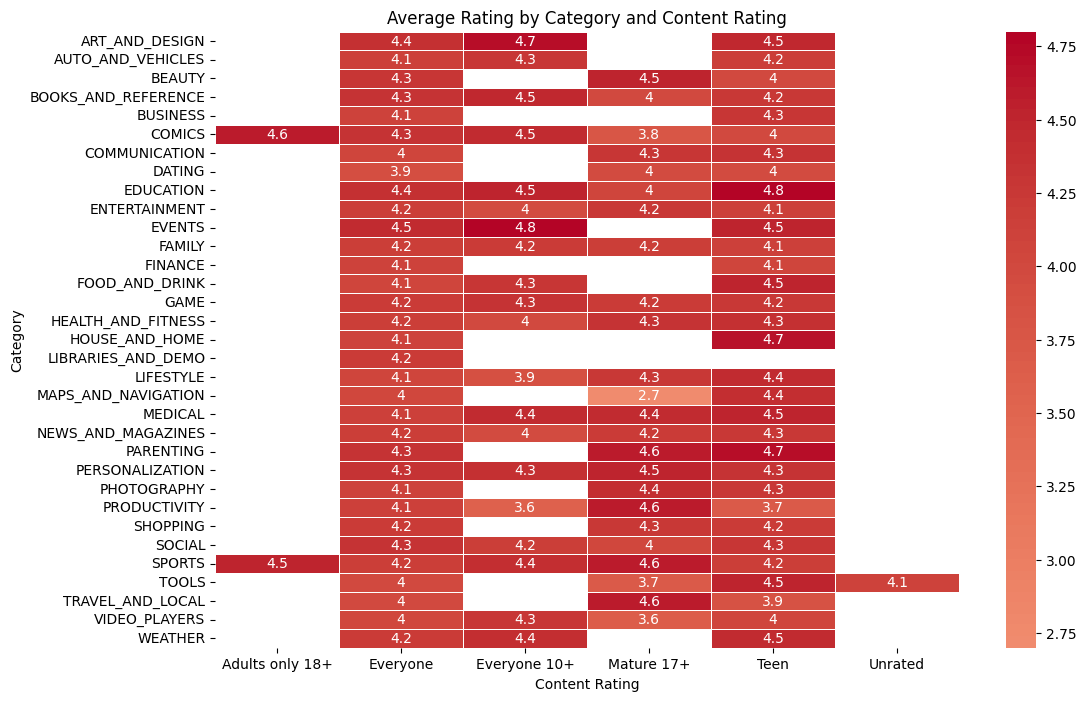

In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from prettytable import PrettyTable

# Load the dataset
data = pd.read_csv('/content/apps.csv')

# Data Preparation

def clean_data(df):
    df = df.dropna()
    df = df.drop_duplicates()
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

    # Converting 'Size' to numerical values
    def convert_size(size):
        if isinstance(size, str):
            if 'M' in size:
                return float(size.replace('M', '')) * 1024
            elif 'k' in size:
                return float(size.replace('k', ''))
            else:
                return np.nan
        else:
            return size

    df['Size'] = df['Size'].apply(convert_size)

    # Converting 'Price' to numerical values
    df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '')) if '$' in x else 0)
    return df
cleaned_data = clean_data(data)

# Displaying the first few rows of the cleaned data in table format
def display_table(df, num_rows=5):
    table = PrettyTable()
    table.field_names = df.columns.tolist()
    for i in range(num_rows):
        table.add_row(df.iloc[i].tolist())
    print(table)

display_table(cleaned_data)


# Data Exploration
data = clean_data(data)

# Category Exploration
def explore_categories(df):
    category_counts = df['Category'].value_counts()
    plt.figure(figsize=(12, 8))
    sns.barplot(x=category_counts.values, y=category_counts.index,
                hue=category_counts.index,
                palette='viridis', legend=False)
    plt.title('Distribution of Apps Across Categories')
    plt.xlabel('Number of Apps')
    plt.ylabel('Category')
    plt.show()

explore_categories(data)

# Metrics Analysis
def analyze_metrics(df):
    # Ratings distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Rating'].dropna(), bins=20, kde=True, color='blue')
    plt.title('Distribution of App Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

    # Size vs. Rating
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Size', y='Rating', data=df, alpha=0.6)
    plt.title('App Size vs. Rating')
    plt.xlabel('Size (KB)')
    plt.ylabel('Rating')
    plt.show()

    # Price vs. Rating
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Price', y='Rating', data=df, alpha=0.6)
    plt.title('App Price vs. Rating')
    plt.xlabel('Price ($)')
    plt.ylabel('Rating')
    plt.show()

analyze_metrics(data)

# Sentiment Analysis
def sentiment_analysis(df):
    sid = SentimentIntensityAnalyzer()

    # Define a function to compute the sentiment scores
    def get_sentiment(text):
        return sid.polarity_scores(text)['compound']

    # Clean the text data
    def clean_text(text):
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        return text

    df['Cleaned_Reviews'] = df['Reviews'].apply(str).apply(clean_text)
    df['Sentiment'] = df['Cleaned_Reviews'].apply(get_sentiment)

    # Visualize sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Sentiment'], bins=20, kde=True, color='green')
    plt.title('Distribution of Sentiment Scores')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.show()

sentiment_analysis(data)

# Interactive Visualization
import plotly.express as px

def interactive_visualization(df):
    fig = px.scatter(df, x='Size', y='Rating', color='Category',
                     hover_data=['App', 'Reviews', 'Price'], title='App Size vs. Rating by Category')
    fig.show()

interactive_visualization(data)

# Skill Enhancement

def custom_visualizations(df):
    # Example custom visualization: Heatmap of average rating per category and content rating
    pivot_table = df.pivot_table(values='Rating', index='Category', columns='Content Rating', aggfunc='mean')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', center=0, linewidths=.5)
    plt.title('Average Rating by Category and Content Rating')
    plt.xlabel('Content Rating')
    plt.ylabel('Category')
    plt.show()

custom_visualizations(data)
